# Business Problem
The dataset comprises two hotel types: Resort hotels and City hotels they have branches globally. 
In recent years, both City Hotel and Resort Hotel have experienced high cancellation rates all over the world, leading to issues such as reduced revenue and underutilized rooms. 
Thus, the primary objective for both hotels is to decrease cancellation rates, enhancing revenue efficiency. 
This report focuses on analyzing hotel booking cancellations and unrelated factors affecting business and annual revenue.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
df = pd.read_csv('E:\python\hotel_booking.csv')

In [3]:
# Overview of the dataset
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


We can clearly see last three columns contains sensitive data of visitors.
So, we'll have to remove these columns: email, phone number, and credit card.

# Exploratory data analysis and Data cleaning

In [4]:
df.drop(['email','phone-number', 'credit_card'], axis = 1, inplace = True)

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD


In [6]:
# Full Information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Here, we can see:

Row(10):children, Row(13):country, Row(23):agent, Row(24):company, all these columns contains null values

Row(31): reservation_status_date: It is a date data type but it show object.

we can't remove such columns which contain fewer null values. we can remove the company and agent columns because they contain huge null values otherwise it will affect our analysis.

** If too much data are missing in a single column then remove columns(well, in this analysis we don’t need company and agent columns so we can remove these)
** If less data are missing then remove rows only.

In [7]:
df.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48


In [8]:
#  To get internal views of columns in the dataset
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print("-"*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [9]:
# Drop columns: agent and company
df.drop(['agent', 'company'], axis = 1, inplace = True)

In [10]:
# Now check null values
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

here, children and country contain null values, now I'll remove null values. 

In [11]:
# Remove null values:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [15]:
# Change date data type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

<AxesSubplot:>

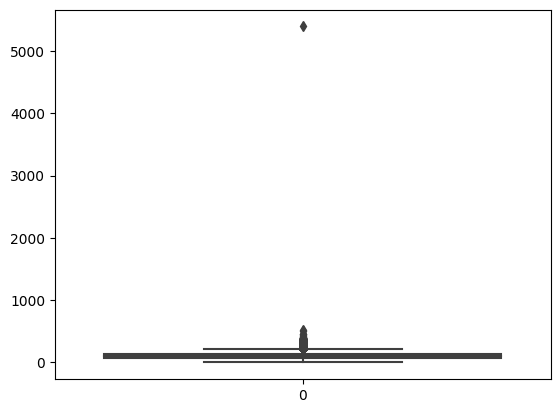

In [17]:
# View outlier in box plot.
sns.boxplot(df['adr'])

Here its clear adr(average daily rate) contains outliers.

In [18]:
# Remove outlies: consider only adr_values > 5000
df = df[df['adr']<5000]

<AxesSubplot:>

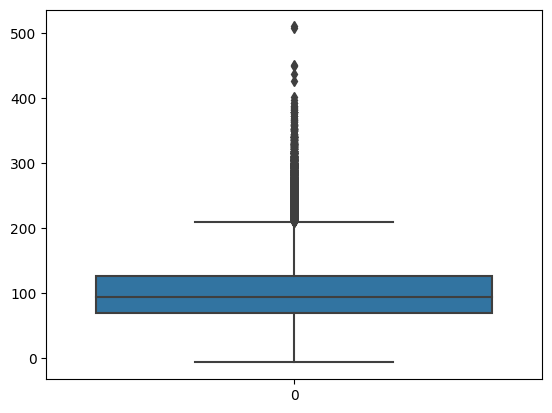

In [19]:
sns.boxplot(df['adr'])

Now its much better. we can perform analysis.

# Lets move to analysis and visualization part

Our main Objective was booking cancellation.

In [1]:
# Reservation status count, Check cancellation and confirmed booking status in percentage wise. Also show in graph
cancellation_per = df['is_canceled'].value_counts(normalize = True)*100
print(cancellation_per)

plt.figure(figsize = (8,4))
plt.title('Reservation status count')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), color = ['green', 'red'] )
plt.show()

NameError: name 'df' is not defined

0: Successful booking

1: cancelled booking

Around 37 % booking are getting cancelled. now we'll explore why this so?

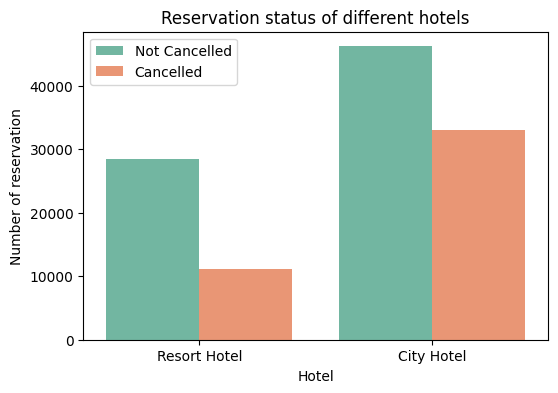

In [21]:
# most of the cancellation are from which hotel: Resort or City Hotel
plt.figure(figsize = (6,4))
axl = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Set2')
legend_label = axl.get_legend_handles_labels()
plt.title('Reservation status of different hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of reservation')
plt.legend(['Not Cancelled','Cancelled'])
plt.show()

Now lets check what percent of city hotel and resort hotel are being cancelled.


In [22]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)*100

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64

In [23]:
city_hotel = df[df['hotel'] =='City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)*100

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64

City hotel: approx 42 % cancellations, its a major issue. Need to figure out why this much cancellation.

In [24]:
# Now create group of hotel reservation_staus_date with adr and take mean.
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()

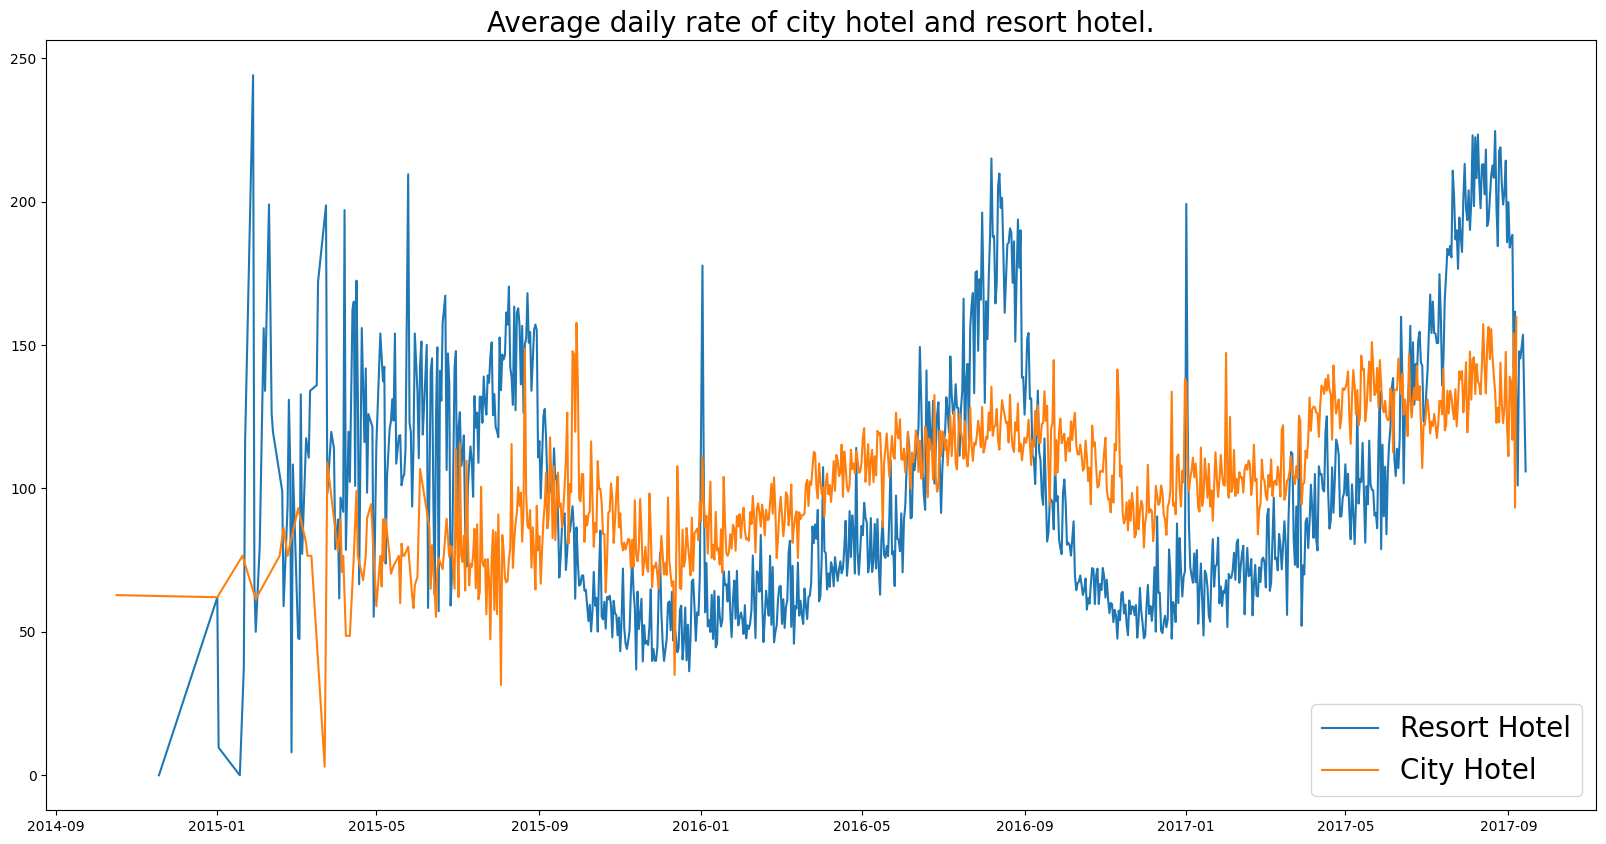

In [25]:
# Now plot it into line graph.
plt.figure(figsize = (20,10))
plt.title('Average daily rate of city hotel and resort hotel.', fontsize = 20)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

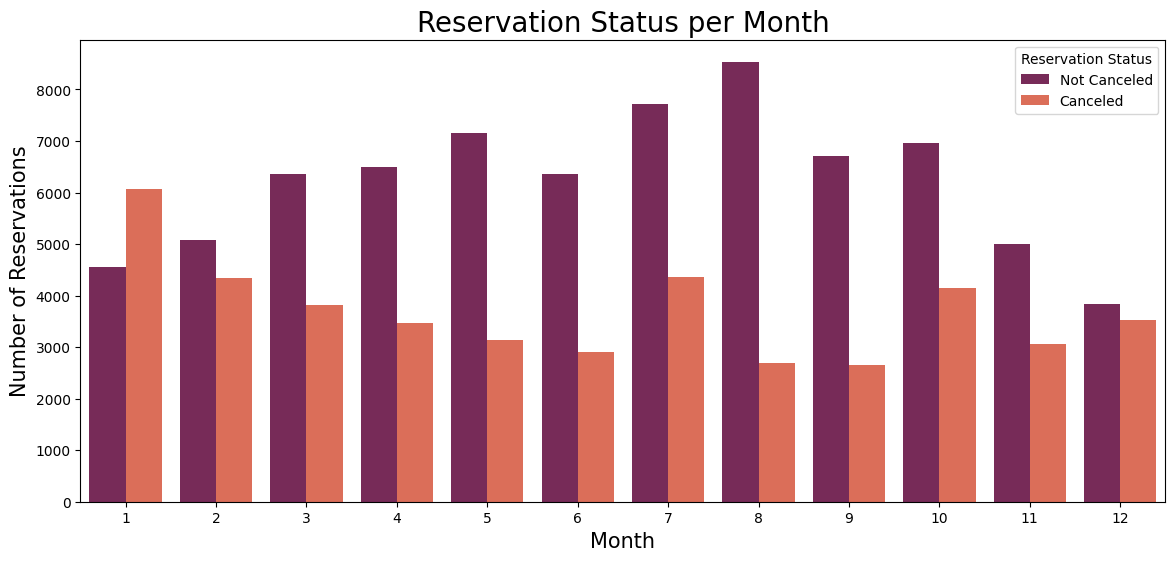

In [26]:
# Now check per month cancellatin and confirmed booking status using bar graph.
df['month'] = df['reservation_status_date'].dt.month #Extracting months from date

plt.figure(figsize=(14, 6))
axl = sns.countplot(x='month', hue='is_canceled', data=df, palette='rocket')
axl.legend(title='Reservation Status', labels=['Not Canceled', 'Canceled'])
plt.title('Reservation Status per Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Reservations',  fontsize=15)
plt.show()

Numbers of cancellation in Janurary is max as compaired to other months.

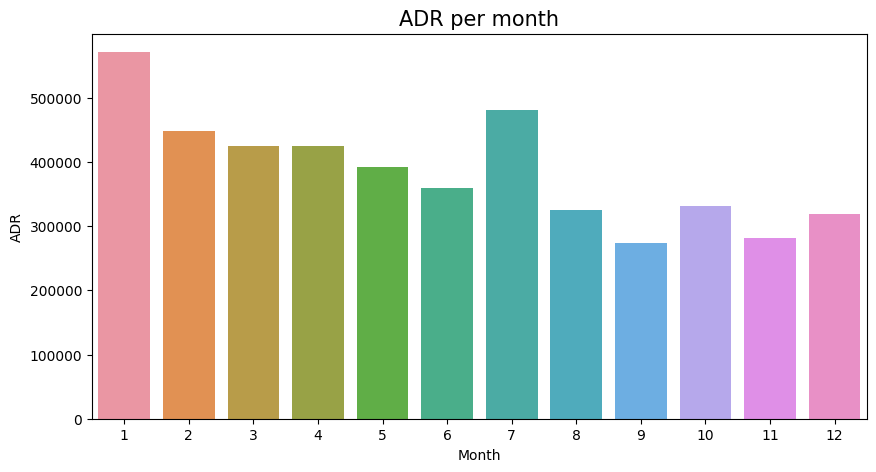

In [27]:
# Now check per months adr.
# df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(10, 5))
plt.title('ADR per month', fontsize=15)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index())
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show()

Here its clear that most of the cancellation on January. Because the adr of january is more. so people prefer cancellation may be they get good hotel at this much cost.

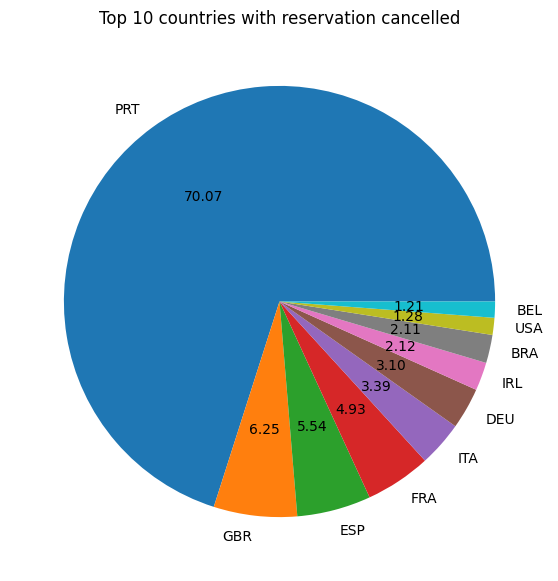

In [28]:
#Top 10 countires those are making most number of cancellation using pie chart.
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10] # top 10
plt.figure(figsize = (7,7))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

here its showing among top 10 countries 70 % of the cancellation are from portugal.

In [29]:
# Hypothesis, most customer are from offline travel agent or online travel agent to make reservation
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [30]:
(df['market_segment'].value_counts(normalize = True)*100).round(2)

Online TA        47.44
Offline TA/TO    20.32
Groups           16.66
Direct           10.47
Corporate         4.30
Complementary     0.62
Aviation          0.20
Name: market_segment, dtype: float64

In [31]:
(cancelled_data['market_segment'].value_counts(normalize = True)*100).round(2)

Online TA        46.97
Groups           27.40
Offline TA/TO    18.75
Direct            4.35
Corporate         2.22
Complementary     0.20
Aviation          0.12
Name: market_segment, dtype: float64

here, most of the cancellation are from Online Travel Agent around 47 %.
This is may be because of hotel condition are not good, when people visits, so they don't get up to the mark, so prefer cancellation.

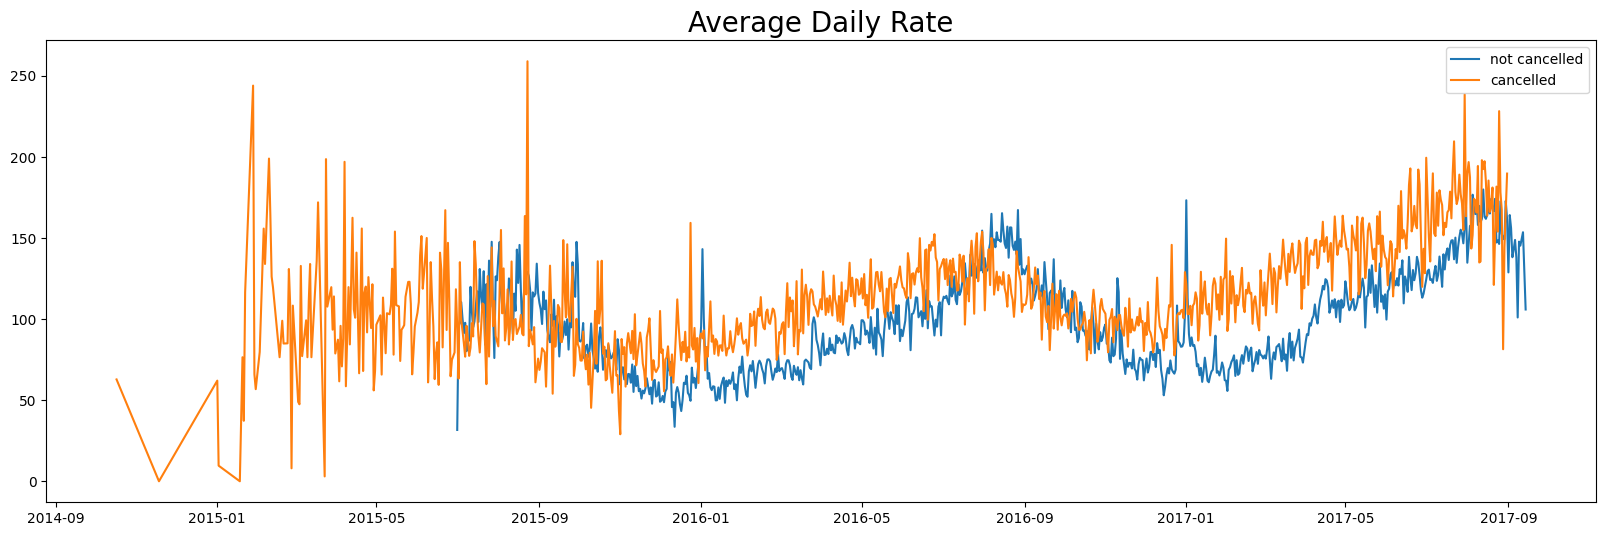

In [32]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace= True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace= True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize= 20)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()


From above graph we can see, data is inconsistent so we'll consider only from 2016 to 2017 to get fruithful result.

In [33]:
#Hiding data before 2016 to get perfect result.
cancelled_df_adr = cancelled_df_adr[cancelled_df_adr['reservation_status_date'] > '2016']
not_cancelled_df_adr = not_cancelled_df_adr[not_cancelled_df_adr['reservation_status_date'] > '2016']

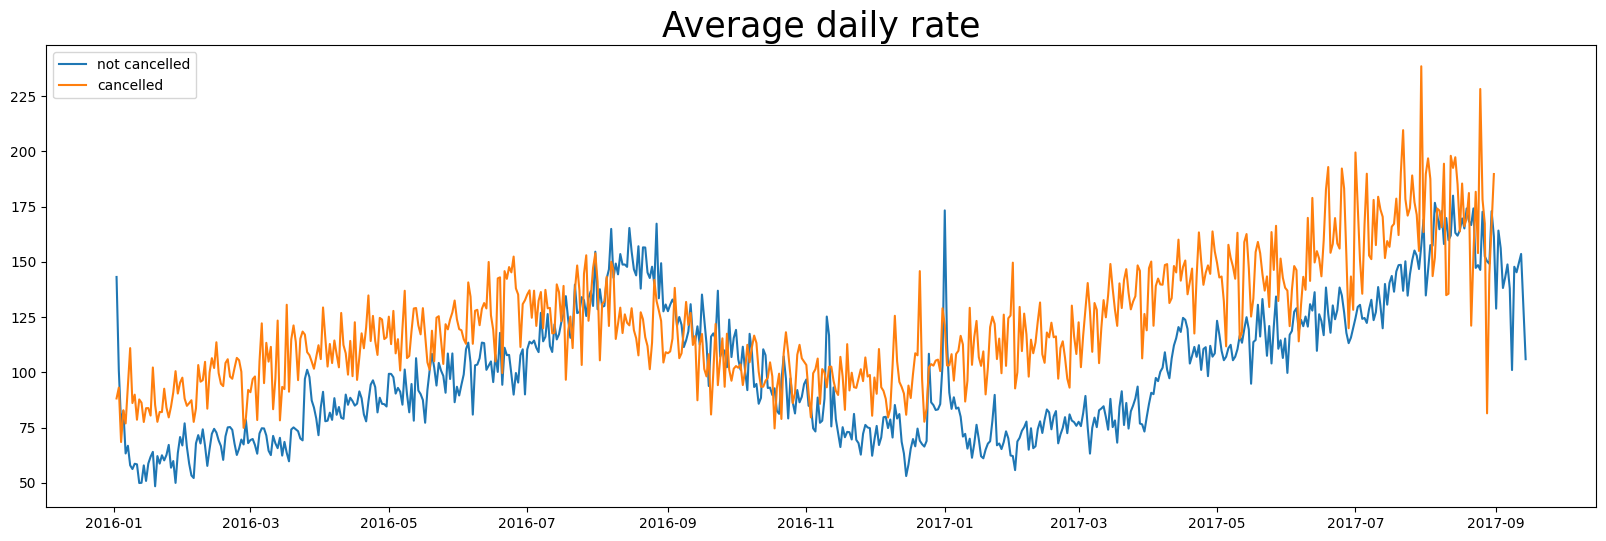

In [34]:
plt.figure(figsize = (20,6))
plt.title('Average daily rate',fontsize = 25)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()

Now its perfect. 

# End